In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from utils import eda
import random as random
from os.path import join as pjoin

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt

from utils import utils
#from utils import knn_validation
#from utils import knn_cross_validation
#from utils import nearest_prototypes

DATA_DIR = './famd_test_data/'

In [3]:
random.seed(2020)
np.random.seed(2020)
test = pjoin(DATA_DIR, 'test.csv')
train = pjoin(DATA_DIR, 'train.csv')
test = pd.read_csv(test, header = 0, delimiter=",", engine='python')
train = pd.read_csv(train, header = 0, delimiter=",", engine='python')


In [4]:
train_samples = train.drop(columns="income")
train_labels = train.income
test_samples = test.drop(columns="income")
test_labels = test.income

(array([15568.,     0., 15404.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

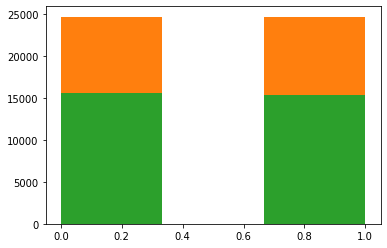

In [7]:
rus = RandomUnderSampler(random_state = 2020)
train_samples_rus, train_labels_rus = rus.fit_sample(train_samples, train_labels)

ros = RandomOverSampler(random_state = 2020)
train_samples_ros, train_labels_ros = ros.fit_sample(train_samples, train_labels)

smote_enn = SMOTEENN(random_state = 2020)
train_samples_smo, train_labels_smo = smote_enn.fit_sample(train_samples, train_labels)

plt.hist(train_labels_rus,bins = 3)
plt.hist(train_labels_ros,bins = 3)
plt.hist(train_labels_smo,bins = 3)

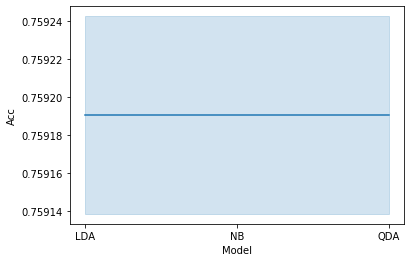

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold

stratified_kfold = StratifiedKFold(n_splits=5,random_state=2020, shuffle=True)
models = [
    (LinearDiscriminantAnalysis, "LDA"),
    (QuadraticDiscriminantAnalysis, "QDA"),
    (GaussianNB, "NB"),
]
def validation_errors(X,y, models):
    for model, name in models:
        for acc in cross_val_score(model(), X, y, cv=stratified_kfold):
            yield name, acc

df = pd.DataFrame(validation_errors(train_samples,train_labels, models), columns=["Model", "Acc"])
sns.lineplot(x="Model", y="Acc", data=df, ci="sd")
plt.show()

In [6]:
test_samples

axe1        axe2
0      319.741900  -67.294993
1      418.427077  -86.363780
2      324.939628 -120.649353
3      319.741918  -67.300177
4      373.379147  216.491942
...           ...         ...
16276  380.617436  210.559285
16277  319.376957  -58.408491
16278  429.690414  -78.437495
16279  318.279868  -45.925682
16280  335.719891 -129.546008

[16281 rows x 2 columns]

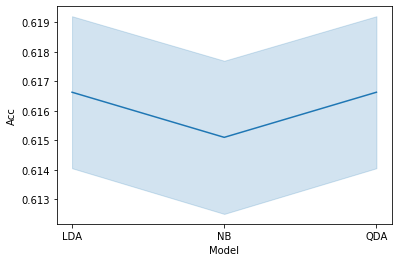

In [8]:
df = pd.DataFrame(validation_errors(train_samples_rus,train_labels_rus, models), columns=["Model", "Acc"])
sns.lineplot(x="Model", y="Acc", data=df, ci="sd")
plt.show()

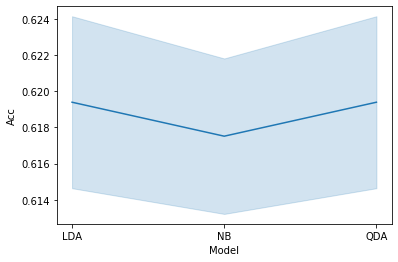

In [9]:
df = pd.DataFrame(validation_errors(train_samples_ros,train_labels_ros, models), columns=["Model", "Acc"])
sns.lineplot(x="Model", y="Acc", data=df, ci="sd")
plt.show()

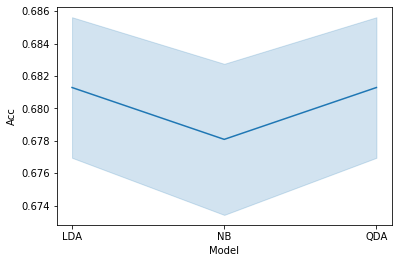

In [10]:
df = pd.DataFrame(validation_errors(train_samples_smo,train_labels_smo, models), columns=["Model", "Acc"])
sns.lineplot(x="Model", y="Acc", data=df, ci="sd")
plt.show()

0        0
1        0
2        1
3        1
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: income, Length: 16281, dtype: int64
[0 0 0 ... 0 0 0]


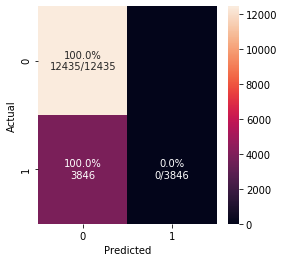

0.7637737239727289
0        0
1        0
2        1
3        1
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: income, Length: 16281, dtype: int64
[0 0 0 ... 0 0 0]


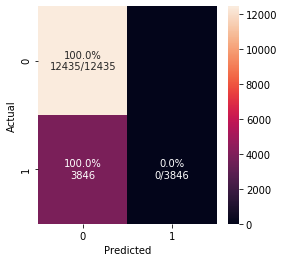

0.7637737239727289
0        0
1        0
2        1
3        1
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: income, Length: 16281, dtype: int64
[0 0 0 ... 0 0 0]


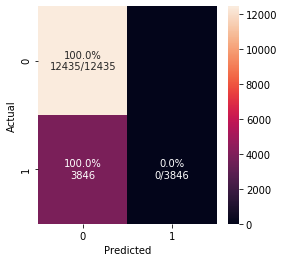

0.7637737239727289


In [11]:
import utils.analysing as AN
from sklearn.metrics import accuracy_score

LDA = LinearDiscriminantAnalysis()
QDA = QuadraticDiscriminantAnalysis()
NB = GaussianNB()

def test(model,train_samples,train_labels,test_samples,test_labels):
    model.fit(train_samples,train_labels)
    pred = model.predict(test_samples)
    AN.plot_confusion_matrix(test_labels,pred)
    print(accuracy_score(test_labels,pred))

test(LDA,train_samples,train_labels,test_samples,test_labels)
test(QDA,train_samples,train_labels,test_samples,test_labels)
test(NB,train_samples,train_labels,test_samples,test_labels)

0        0
1        0
2        1
3        1
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: income, Length: 16281, dtype: int64
[0 0 0 ... 0 0 0]


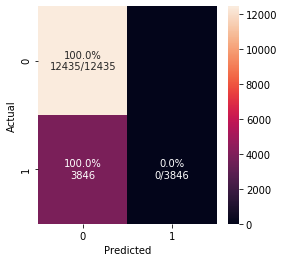

0.7637737239727289


In [12]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=2020)
test(LR,train_samples,train_labels,test_samples,test_labels)

0        0
1        0
2        1
3        1
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: income, Length: 16281, dtype: int64
[1 1 1 ... 1 1 1]


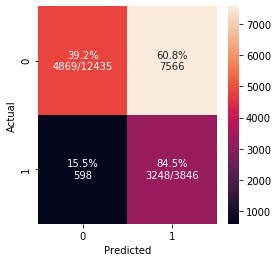

0.4985565997174621
0        0
1        0
2        1
3        1
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: income, Length: 16281, dtype: int64
[1 1 1 ... 1 1 1]


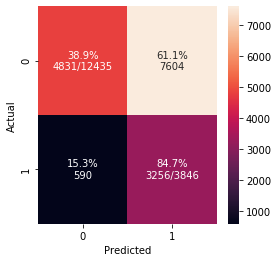

0.49671396105890303
0        0
1        0
2        1
3        1
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: income, Length: 16281, dtype: int64
[1 1 1 ... 1 0 1]


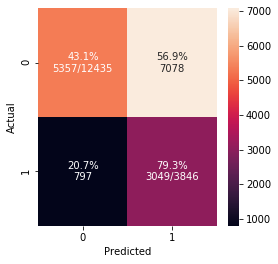

0.5163073521282476


In [13]:
test(LDA,train_samples_rus,train_labels_rus,test_samples,test_labels)
test(QDA,train_samples_rus,train_labels_rus,test_samples,test_labels)
test(NB,train_samples_rus,train_labels_rus,test_samples,test_labels)

0        0
1        0
2        1
3        1
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: income, Length: 16281, dtype: int64
[1 1 1 ... 1 1 1]


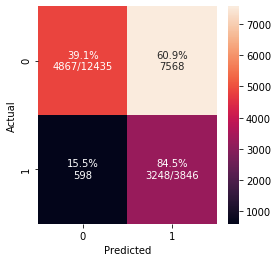

0.4984337571402248
0        0
1        0
2        1
3        1
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: income, Length: 16281, dtype: int64
[1 1 1 ... 1 1 1]


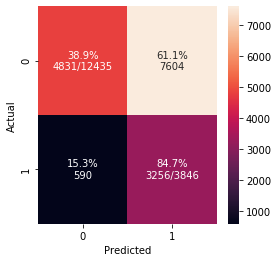

0.49671396105890303
0        0
1        0
2        1
3        1
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: income, Length: 16281, dtype: int64
[1 1 1 ... 1 0 1]


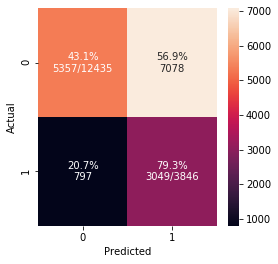

0.5163073521282476


In [14]:
test(LDA,train_samples_ros,train_labels_ros,test_samples,test_labels)
test(QDA,train_samples_ros,train_labels_ros,test_samples,test_labels)
test(NB,train_samples_ros,train_labels_ros,test_samples,test_labels)

0        0
1        0
2        1
3        1
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: income, Length: 16281, dtype: int64
[1 1 1 ... 1 1 1]


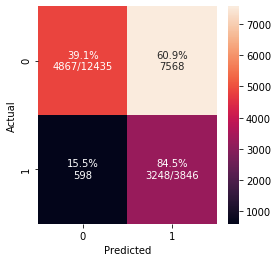

0.4984337571402248
0        0
1        0
2        1
3        1
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: income, Length: 16281, dtype: int64
[1 1 1 ... 1 1 1]


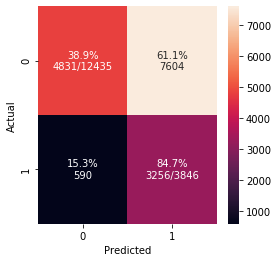

0.49671396105890303
0        0
1        0
2        1
3        1
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: income, Length: 16281, dtype: int64
[0 1 1 ... 1 0 1]


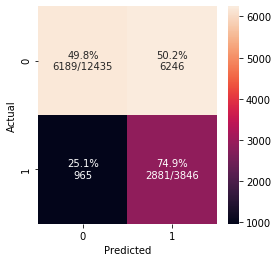

0.5570910877710215


In [15]:
test(LDA,train_samples_smo,train_labels_smo,test_samples,test_labels)
test(QDA,train_samples_smo,train_labels_smo,test_samples,test_labels)
test(NB,train_samples_smo,train_labels_smo,test_samples,test_labels)